In [13]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
# load dataset
df = pd.read_csv("occupancy.csv") 
df.head()

,Date,Temp,Humidity,Light,CO2,Humidity _Ratio,Occupancy
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [26]:
df.columns

Index(['Date', 'Temp', 'Humidity', 'Light', 'CO2', 'Humidity _Ratio',
       'Occupancy '],
      dtype='object')

In [41]:
#split dataset in features and target variable
x_data=df[['Temp','Humidity','CO2','Humidity _Ratio', 'Light']]
y_data=df['Occupancy ']


In [42]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9935064935064936


# **Visualizing Decision Trees**

In [53]:
!pip install graphviz
!pip install pydotplus
!pip install six

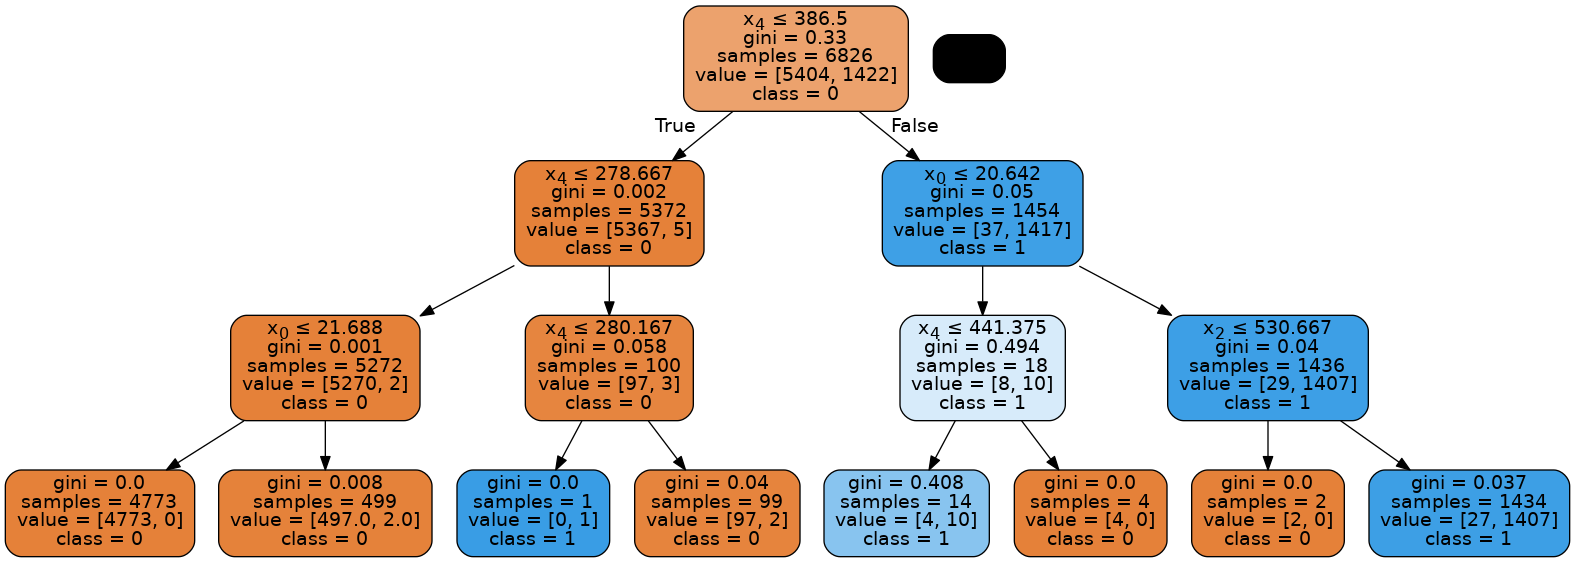

In [54]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Occupancy.png')
Image(graph.create_png())

Layer 0
The root branch is a binary classification from class 0 - No occupancy to class 1 - occupancy, given that the feature x4- "light" is less than or equal  equal to 386.5 If the value is greater, the data will most likely be class 1. If the value is less than or equal to, it will most likely be class 1. 

Layer 1
The following class 0 node, further looks for x4 - "light" is less than or equal to 278.6  
the following class 1 node checks fro the x0 - temperature is less than or equal to 20.642

Layer 2
Class 0 node True - x0 "Temp" Less than or equal to 21.688 splits into two final class 0 nodes totalling 5272 nodes representing class 0
Class 0 Node False - x4 "light" Less than or equal to 280.167 Splits into two nodes, with one data point being represented in the true category as being class 1, while 99 points in the false category are class 0 

Class 1 Node True  - x4 "light" is less than or equal to 441.375 splits into two classes with 14 nodes in the true category representing class 1, and 4 samples representing class 0 
Class 1 Node False - x2 "C02" is less than or equal to 530.667  splits intwo two classes, with 2 samples in the true category reporting class 0. amd 1434 samples in class 1. 

Dear Mr Anderson, at glance you can see the blue squared splits represent a Class=1 samples, while the orange boxes represetn a Class=0. To explain a little more our data repressented the Occupancy levels, in regards to features such as Light, which was a big factor represented through the x4 mark, and other features like humidity, temparature, C02 levels, and humidity ratio. Using light as the main factor to influence the Occupancy levels, we got 99% accuracy in our Decision Tree prediction, where we see the binary splits, i refrenced earlier. Class 1 of course being all the false samples, and Class 0 being all the samples which were true. 